# Plot curvilinear-grid model output

In [1]:
%pylab inline
import netCDF4
import xarray
from netCDF4 import Dataset

Populating the interactive namespace from numpy and matplotlib


Read through: http://xarray.pydata.org/en/stable/data-structures.html#coordinates to see if it reads through 2-d coordinates, maybe look at xgcm as well

### Reading in data through netCDF4 and xarray

In [2]:
ncf = Dataset('../example_1degree_data/ocean.0001-0010.ssh.nc', "r", format="NetCDF4")
xdata = xarray.open_dataset('../example_1degree_data/ocean.0001-0010.ssh.nc')

ncf_grid = Dataset('../example_1degree_data/ocean.static.nc', 'r', format="NetCDF4")
xdata_grid = xarray.open_dataset('../example_1degree_data/ocean.static.nc')

/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [3]:
ncf_grid

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    filename: ocean.static.nc
    title: SPEAR_c96_o1_Control_1850_E50
    grid_type: regular
    grid_tile: N/A
    external_variables: area_t area_t area_t
    dimensions(sizes): yq(320), xq(360), yh(320), xh(360)
    variables(dimensions): float32 Coriolis(yq,xq), float32 area_t(yh,xh), float32 areacello(yh,xh), float32 areacello_bu(yq,xq), float32 areacello_cu(yh,xq), float32 areacello_cv(yq,xh), float32 depth_ocean(yh,xh), float32 deptho(yh,xh), float32 dxCu(yh,xq), float32 dxCv(yq,xh), float32 dxt(yh,xh), float32 dyCu(yh,xq), float32 dyCv(yq,xh), float32 dyt(yh,xh), float32 geolat(yh,xh), float32 geolat_c(yq,xq), float32 geolat_u(yh,xq), float32 geolat_v(yq,xh), float32 geolon(yh,xh), float32 geolon_c(yq,xq), float32 geolon_u(yh,xq), float32 geolon_v(yq,xh), float32 sftof(yh,xh), float32 wet(yh,xh), float32 wet_c(yq,xq), float32 wet_u(yh,xq), float32 wet_v(yq,xh), float64 xh(xh),

Loading in the original dataset as a reference.

In [4]:
ncf_old = Dataset('example_data/WOA13_annual_SST_nc3_classic.nc', "r", format="NetCDF4");

In [5]:
ncf_old;

In [6]:
xdata.variables;

In [7]:
ncf

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    filename: ocean.0001-0010.ssh.nc
    title: SPEAR_c96_o1_Control_1850_E50
    associated_files: area_t: 00010101.ocean_static.nc
    grid_type: regular
    grid_tile: N/A
    external_variables: area_t
    comment: FMS time averaging, version 3.0, precision=double
    dimensions(sizes): time(10), nv(2), yh(320), xh(360)
    variables(dimensions): float64 nv(nv), float32 ssh(time,yh,xh), float64 time(time), float64 time_bnds(time,nv), float64 xh(xh), float64 yh(yh), float64 average_T1(time), float64 average_T2(time), float64 average_DT(time)
    groups: 

Reassigning variables

In [8]:
xh = ncf.variables['xh']
yh = ncf.variables['yh']
ssh = ncf.variables['ssh']

In [9]:
ncf_old.variables['tos'];

In [10]:
ssh

<class 'netCDF4._netCDF4.Variable'>
float32 ssh(time, yh, xh)
    long_name: Sea Surface Height
    units: m
    missing_value: -1e+34
    _FillValue: -1e+34
    cell_measures: area: area_t
    cell_methods: area:mean yh:mean xh:mean time: mean
    time_avg_info: average_T1,average_T2,average_DT
unlimited dimensions: time
current shape = (10, 320, 360)
filling off

In [11]:
ssh[1].shape

(320, 360)

### Clearly from netCDF4, this is messed up.

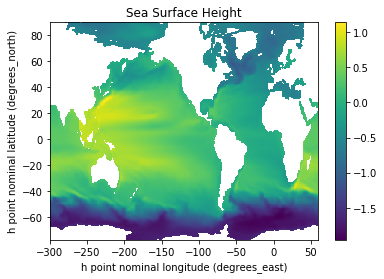

In [12]:
plt.pcolormesh(xh[:], yh[:], ssh[1] ) # picked an arbitrary time for ssh
plt.colorbar();
plt.title(ssh.long_name);
plt.xlabel('%s (%s)' %(xh.long_name, xh.units));

plt.ylabel('%s (%s)' %(yh.long_name, yh.units));

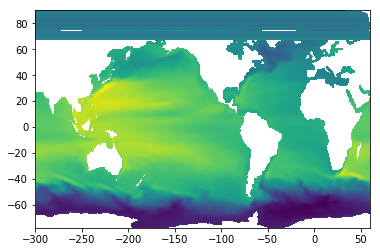

In [17]:
xq = ncf_grid.variables['geolon_c'][:]
yq = ncf_grid.variables['geolat_c']
plt.pcolormesh(xq, yq, ssh[1])

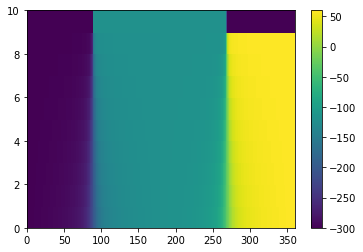

In [18]:
plt.pcolormesh(xq[-10:,:])
plt.colorbar()
plt.figure();

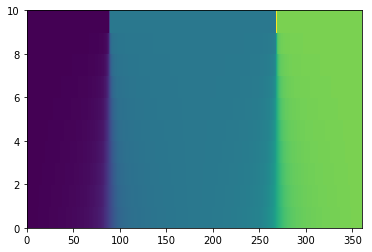

In [19]:
def monotonize_x(x):
    for i in range(1,len(x)):
        if x[i]<x[i-1]: x[i] += 360
    return x
xq[-1,:] = monotonize_x( xq[-1,:] )
plt.pcolormesh(xq[-10:,:])

(-300, 60)

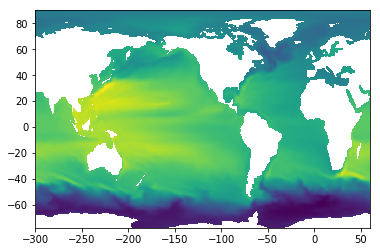

In [21]:
plt.pcolormesh(xq, yq, ssh[1])
plt.xlim(-300, 60)

### Now, we plot with xarray

In [22]:
x = xdata['xh']
y = xdata['yh']
xssh = xdata['ssh']

In [23]:
xssh

<xarray.DataArray 'ssh' (time: 10, yh: 320, xh: 360)>
[1152000 values with dtype=float64]
Coordinates:
  * time     (time) object    1-07-02 12:00:00    2-07-02 12:00:00 ...
  * xh       (xh) float64 -299.5 -298.5 -297.5 -296.5 -295.5 -294.5 -293.5 ...
  * yh       (yh) float64 -77.77 -77.56 -77.34 -77.12 -76.9 -76.67 -76.44 ...
Attributes:
    long_name:      Sea Surface Height
    units:          m
    cell_measures:  area: area_t
    cell_methods:   area:mean yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT

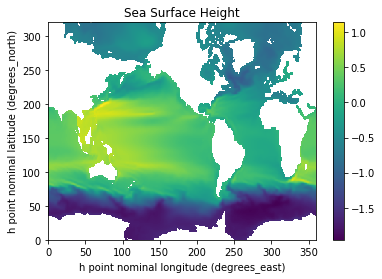

In [24]:
plt.pcolormesh( xssh[1] )
plt.colorbar();

plt.title(xssh.long_name);
plt.xlabel('%s (%s)' %(x.long_name, x.units));
plt.ylabel('%s (%s)' %(y.long_name, y.units));

### Loading in multiple datasets

In [25]:
datasets = ['../example_1degree_data/ocean.0001-0010.ssh.nc', '../example_1degree_data/ocean.static.nc']

This requires `dask` so I conda installed it.

In [63]:
grid_combined = xarray.open_mfdataset(datasets)

/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [64]:
grid_combined

<xarray.Dataset>
Dimensions:       (nv: 2, time: 10, xh: 360, xq: 360, yh: 320, yq: 320)
Coordinates:
  * nv            (nv) float64 1.0 2.0
  * time          (time) object    1-07-02 12:00:00    2-07-02 12:00:00 ...
  * xh            (xh) float64 -299.5 -298.5 -297.5 -296.5 -295.5 -294.5 ...
  * yh            (yh) float64 -77.77 -77.56 -77.34 -77.12 -76.9 -76.67 ...
  * xq            (xq) float64 -299.0 -298.0 -297.0 -296.0 -295.0 -294.0 ...
  * yq            (yq) float64 -77.67 -77.45 -77.23 -77.01 -76.78 -76.55 ...
Data variables:
    ssh           (time, yh, xh) float64 dask.array<shape=(10, 320, 360), chunksize=(10, 320, 360)>
    time_bnds     (time, nv) timedelta64[ns] dask.array<shape=(10, 2), chunksize=(10, 2)>
    average_T1    (time) object dask.array<shape=(10,), chunksize=(10,)>
    average_T2    (time) object dask.array<shape=(10,), chunksize=(10,)>
    average_DT    (time) timedelta64[ns] dask.array<shape=(10,), chunksize=(10,)>
    Coriolis      (yq, xq) float64 dask.ar

In [74]:
# grid_combined.coords['geolon_c'] = grid_combined['geolon_c']
# grid_combined.coords['geolat_c'] = grid_combined['geolat_c']
grid_combined.coords['xh'] = grid_combined['geolon']
grid_combined.coords['yh'] = grid_combined['geolat']

MissingDimensionsError: 'xh' has more than 1-dimension and the same name as one of its dimensions ('yh', 'xh'). xarray disallows such variables because they conflict with the coordinates used to label dimensions.

In [69]:
del grid_combined.coords['xq']
del grid_combined.coords['yq']

In [70]:
del grid_combined.coords['xh']
del grid_combined.coords['yh']

In [71]:
grid_combined.coords

Coordinates:
  * nv       (nv) float64 1.0 2.0
  * time     (time) object    1-07-02 12:00:00    2-07-02 12:00:00 ...
    geolon   (yh, xh) float64 dask.array<shape=(320, 360), chunksize=(320, 360)>

In [72]:
grid_combined.set_coords(['geolon', 'geolat'])

<xarray.Dataset>
Dimensions:       (nv: 2, time: 10, xh: 360, xq: 360, yh: 320, yq: 320)
Coordinates:
  * nv            (nv) float64 1.0 2.0
  * time          (time) object    1-07-02 12:00:00    2-07-02 12:00:00 ...
    geolat        (yh, xh) float64 dask.array<shape=(320, 360), chunksize=(320, 360)>
    geolon        (yh, xh) float64 dask.array<shape=(320, 360), chunksize=(320, 360)>
Dimensions without coordinates: xh, xq, yh, yq
Data variables:
    ssh           (time, yh, xh) float64 dask.array<shape=(10, 320, 360), chunksize=(10, 320, 360)>
    time_bnds     (time, nv) timedelta64[ns] dask.array<shape=(10, 2), chunksize=(10, 2)>
    average_T1    (time) object dask.array<shape=(10,), chunksize=(10,)>
    average_T2    (time) object dask.array<shape=(10,), chunksize=(10,)>
    average_DT    (time) timedelta64[ns] dask.array<shape=(10,), chunksize=(10,)>
    Coriolis      (yq, xq) float64 dask.array<shape=(320, 360), chunksize=(320, 360)>
    area_t        (yh, xh) float64 dask.arra

In [68]:
grid_combined.reset_coords()

<xarray.Dataset>
Dimensions:       (nv: 2, time: 10, xh: 360, xq: 360, yh: 320, yq: 320)
Coordinates:
  * nv            (nv) float64 1.0 2.0
  * time          (time) object    1-07-02 12:00:00    2-07-02 12:00:00 ...
  * xh            (xh) float64 -299.5 -298.5 -297.5 -296.5 -295.5 -294.5 ...
  * yh            (yh) float64 -77.77 -77.56 -77.34 -77.12 -76.9 -76.67 ...
  * xq            (xq) float64 -299.0 -298.0 -297.0 -296.0 -295.0 -294.0 ...
  * yq            (yq) float64 -77.67 -77.45 -77.23 -77.01 -76.78 -76.55 ...
Data variables:
    ssh           (time, yh, xh) float64 dask.array<shape=(10, 320, 360), chunksize=(10, 320, 360)>
    time_bnds     (time, nv) timedelta64[ns] dask.array<shape=(10, 2), chunksize=(10, 2)>
    average_T1    (time) object dask.array<shape=(10,), chunksize=(10,)>
    average_T2    (time) object dask.array<shape=(10,), chunksize=(10,)>
    average_DT    (time) timedelta64[ns] dask.array<shape=(10,), chunksize=(10,)>
    Coriolis      (yq, xq) float64 dask.ar

In [60]:
xarray_ssh = grid_combined['ssh']

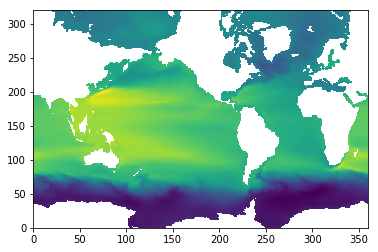

In [61]:
plt.pcolormesh(xarray_ssh[0])

## Attempts to plot with xarray

_Pretty sure either there is some sort of manipulation that has to go on with xarray or something with how we past parameters to pcolormesh? Looked through other Github repositories (https://github.com/spencerahill/aospy/issues) and comments that other people had but still couldn't quite figure out how to correctly plot the corners_

Below are just attempts to plot different parameters along with `ssh`.


In [ ]:
plot('xq', 'yq')

In [ ]:
plot('xh', 'yh')

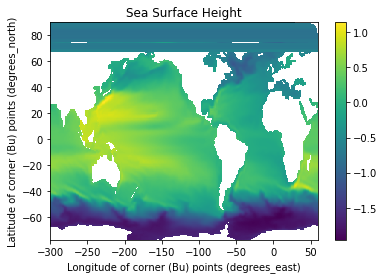

In [42]:
plot('geolon_c', 'geolat_c')

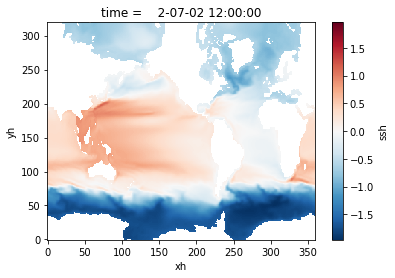

In [73]:
grid_combined['ssh'][1].plot()

In [ ]:
lonc = grid_combined['geolon_c']
latc = grid_combined['geolat_c']
gssh = grid_combined['ssh']

In [ ]:
grid_combined.coords

In [ ]:
grid_combined['wet']

In [ ]:
plt.pcolormesh( lonc, latc, grid_combined['ssh'][1] );
plt.colorbar();

plt.title(xssh.long_name);
plt.xlabel('%s (%s)' %(lonc.long_name, lonc.units));
plt.ylabel('%s (%s)' %(latc.long_name, latc.units));

### Function to plot for given parameters

In [41]:
def plot(first, second):
    plt.pcolormesh( grid_combined.coords[first], grid_combined.coords[second], grid_combined['ssh'][1] );
    plt.colorbar();

    plt.title(xssh.long_name);
    plt.xlabel('%s (%s)' %(grid_combined[first].long_name, grid_combined[first].units));
    plt.ylabel('%s (%s)' %(grid_combined[second].long_name, grid_combined[second].units));

In [83]:
newds = xarray.Dataset({
    'ssh': (['time', 'yh', 'xh'], ncf.variables['ssh'][:])},
    coords={'lon': (['x', 'y'], ncf_grid['geolon'][:]),
            'lat': (['x', 'y'], ncf_grid['geolat'][:]),
            'time': (['time'], ncf['time'][:])})

/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


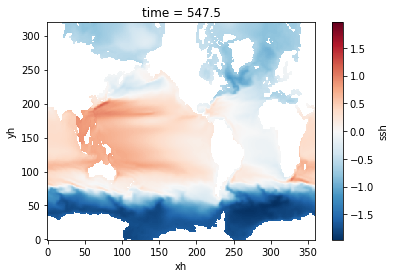

In [86]:
newds['ssh'][1].plot()